In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error
from sklearn.manifold import TSNE
from math import sqrt
from scipy.stats import probplot
from sklearn.manifold import TSNE

### <b>III <span style='color:#7b3f00'>|</span> Input the data</b>

In [ ]:
df = pd.read_csv("/kaggle/input/insurance/insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# <span style="color:#E888BB; font-size: 1%;">1 | EXPLORATORY DATA ANALYSIS</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/3683056/pexels-photo-3683056.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>1 | EXPLORATORY DATA ANALYSIS </span></b> </div>

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> 1. Data Quality</span></b> </div>

### <b>I <span style='color:#7b3f00'>|</span> Handling Duplicates</b>

In [ ]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (1, 7)


In [ ]:
df = df.drop_duplicates()

### <b>II <span style='color:#7b3f00'>|</span> Uniqueness</b>

In [ ]:
# Loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

age: 47 distinct values
sex: 2 distinct values
bmi: 548 distinct values
children: 6 distinct values
smoker: 2 distinct values
region: 4 distinct values
charges: 1337 distinct values


### <b>III <span style='color:#7b3f00'>|</span> Missing Values</b>

In [ ]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


### <b>IV <span style='color:#7b3f00'>|</span> Describe the Data</b>

In [ ]:
df.describe().style.format("{:.2f}")

,age,bmi,children,charges
count,1337.00,1337.00,1337.00,1337.00
mean,39.22,30.66,1.10,13279.12
std,14.04,6.10,1.21,12110.36
min,18.00,15.96,0.00,1121.87
25%,27.00,26.29,0.00,4746.34
50%,39.00,30.40,1.00,9386.16
75%,51.00,34.70,2.00,16657.72
max,64.00,53.13,5.00,63770.43


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> 2. Univariate Analysis</span></b> </div>

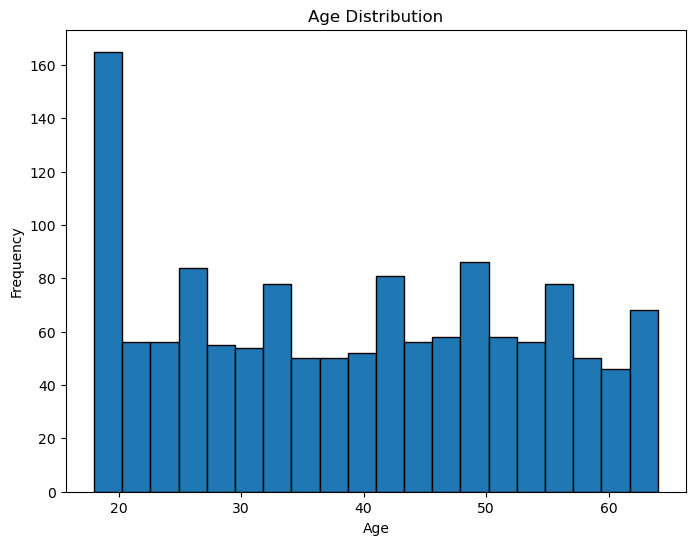

In [ ]:
# Visualization : Histogram of age distribution
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

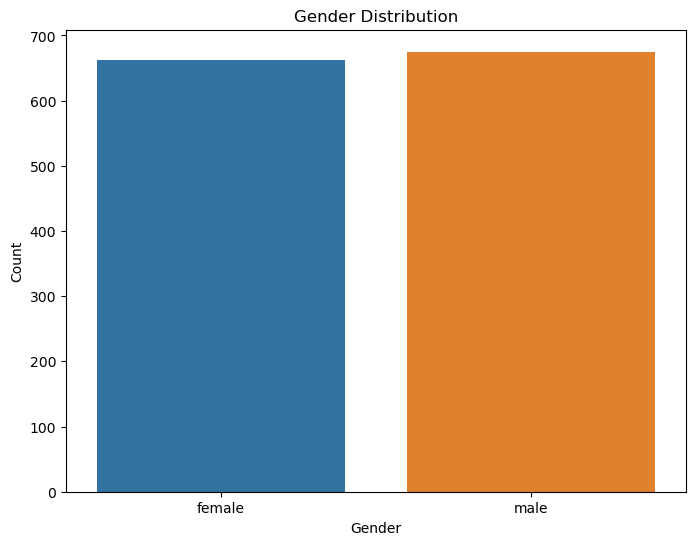

In [ ]:
# Visualization : Bar plot of gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sex')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

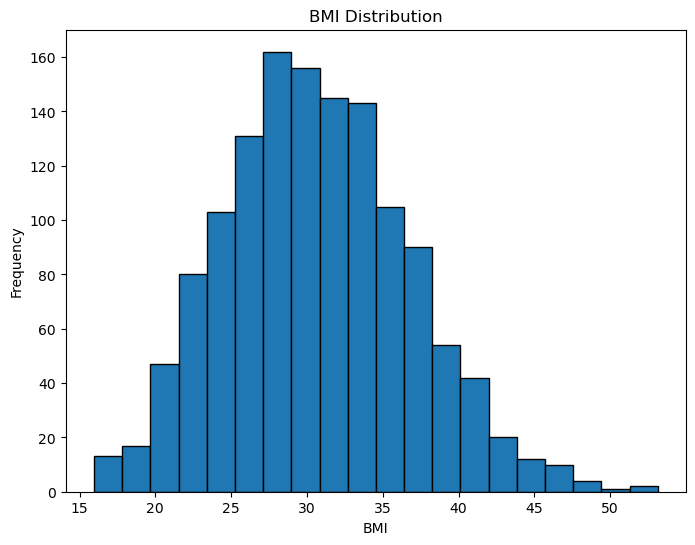

In [ ]:
# Visualization : Histogram of BMI values
plt.figure(figsize=(8, 6))
plt.hist(df['bmi'], bins=20, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution')
plt.show()

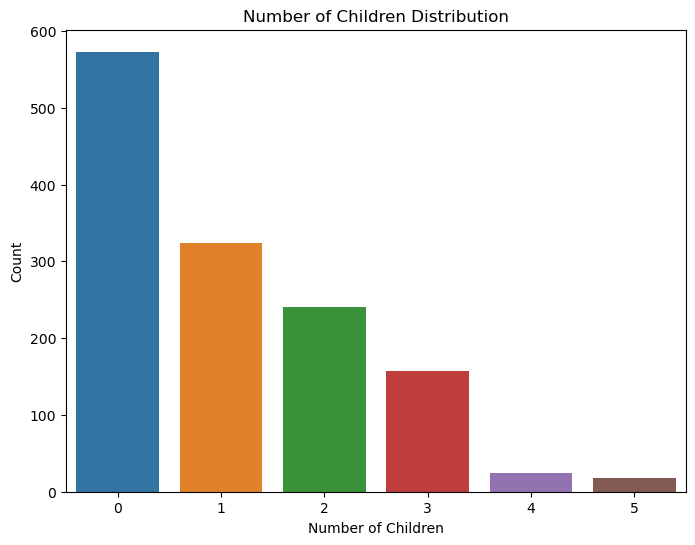

In [ ]:
# Visualization : Bar plot of the number of children/dependents
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.title('Number of Children Distribution')
plt.show()

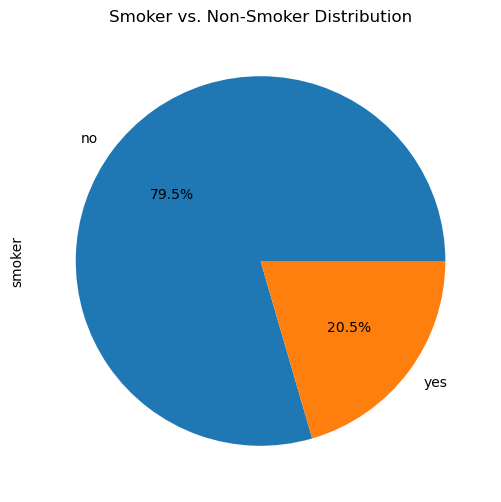

In [ ]:
# Visualization : Pie chart of smoker vs. non-smoker distribution
plt.figure(figsize=(8, 6))
df['smoker'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Smoker vs. Non-Smoker Distribution')
plt.show()

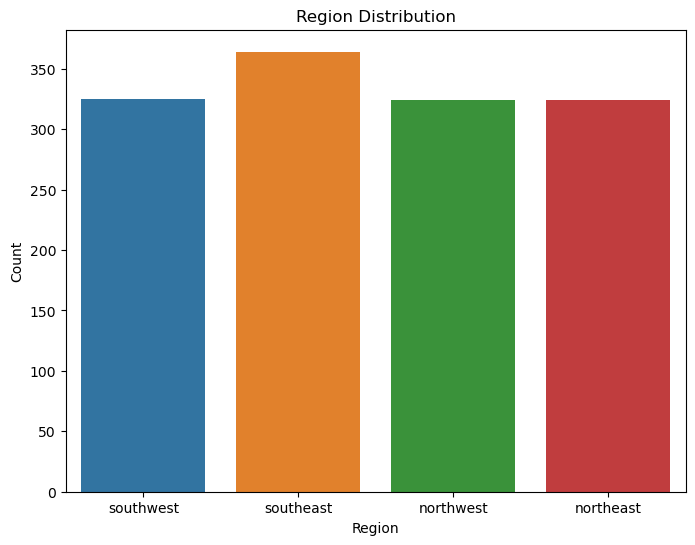

In [ ]:
# Visualization : Bar plot of region distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region Distribution')
plt.show()

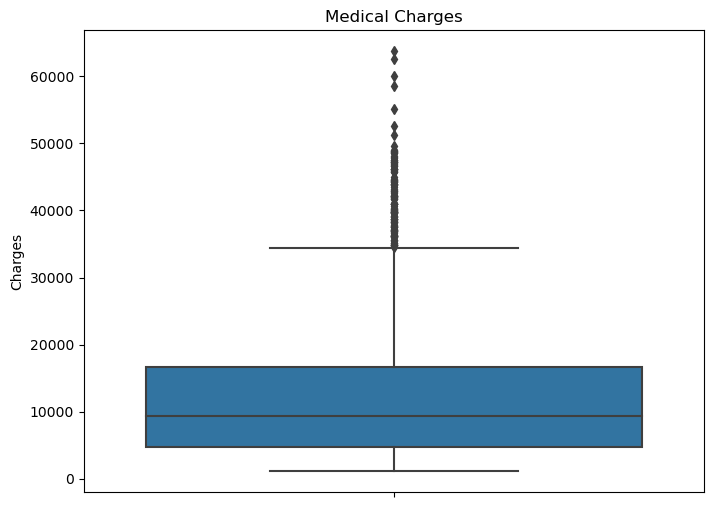

In [ ]:
# Visualization : Box plot of medical charges
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='charges')
plt.ylabel('Charges')
plt.title('Medical Charges')
plt.show()

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> 2. Bivariate Analysis</span></b> </div>

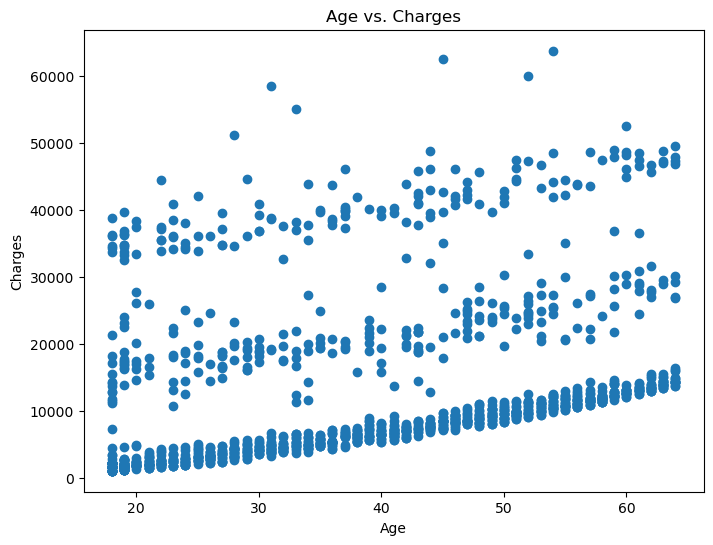

In [ ]:
# Visualization : Scatter plot of age vs. charges
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs. Charges')
plt.show()

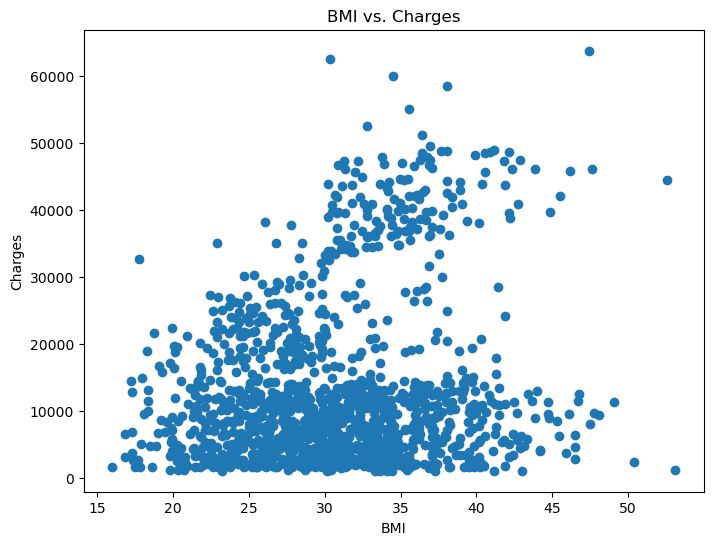

In [ ]:
# Visualization : Scatter plot of BMI vs. charges
plt.figure(figsize=(8, 6))
plt.scatter(df['bmi'], df['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs. Charges')
plt.show()

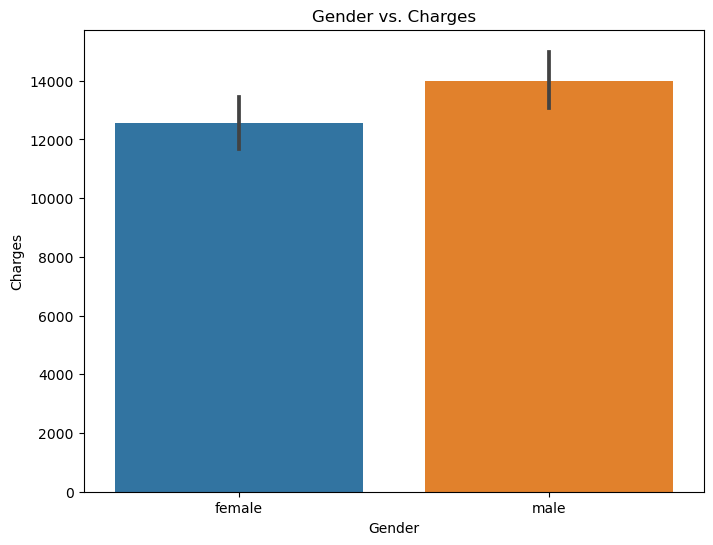

In [ ]:
# Visualization : Grouped bar plot of gender vs. charges
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='sex', y='charges')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.title('Gender vs. Charges')
plt.show()

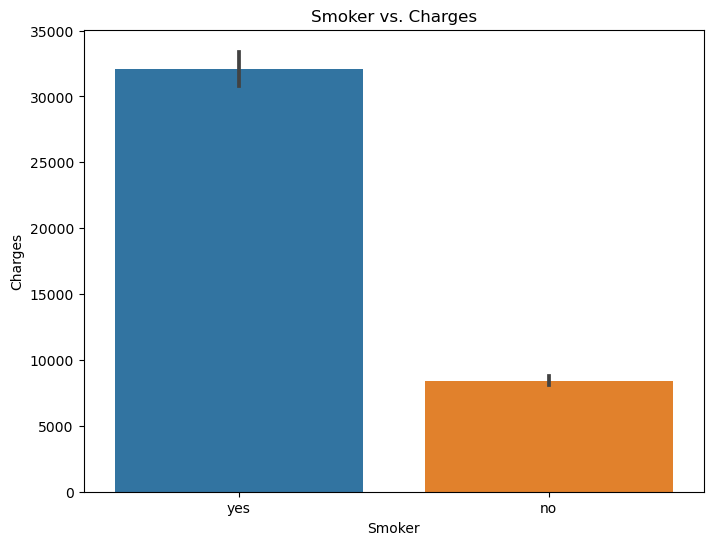

In [ ]:
# Visualization : Grouped bar plot of smoker vs. charges
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='smoker', y='charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Smoker vs. Charges')
plt.show()

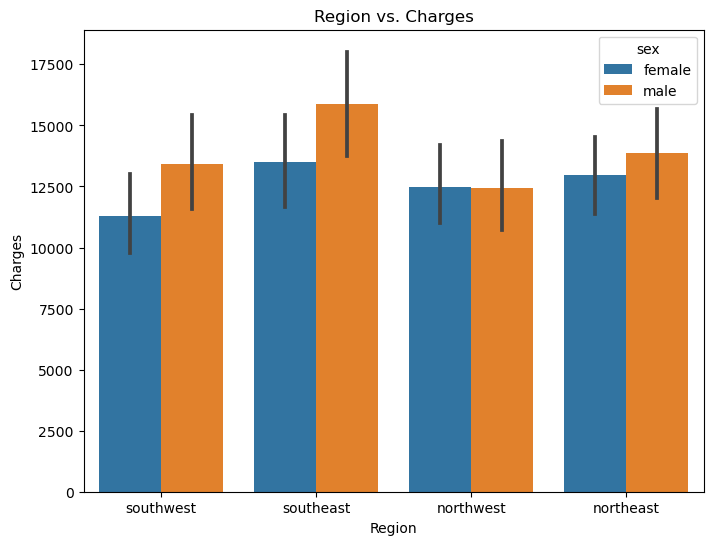

In [ ]:
# Visualization : Stacked bar plot of region vs. charges
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='region', y='charges', hue='sex')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Region vs. Charges')
plt.show()

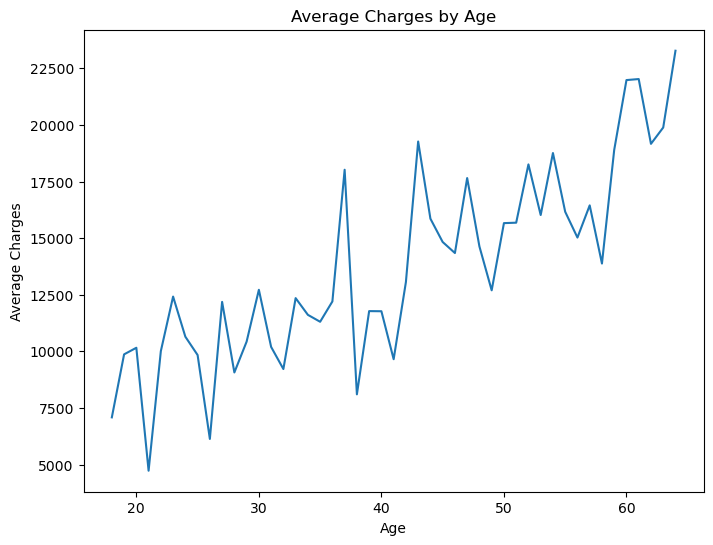

In [ ]:
# Visualization : Line plot showing the average charges by age
avg_charges_by_age = df.groupby('age')['charges'].mean()
plt.figure(figsize=(8, 6))
plt.plot(avg_charges_by_age.index, avg_charges_by_age.values)
plt.xlabel('Age')
plt.ylabel('Average Charges')
plt.title('Average Charges by Age')
plt.show()

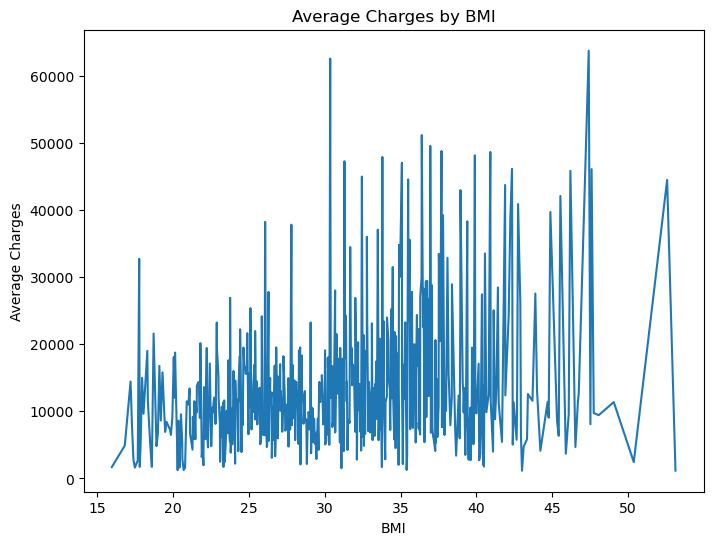

In [ ]:
# Visualization : Line plot showing the average charges by BMI
avg_charges_by_bmi = df.groupby('bmi')['charges'].mean()
plt.figure(figsize=(8, 6))
plt.plot(avg_charges_by_bmi.index, avg_charges_by_bmi.values)
plt.xlabel('BMI')
plt.ylabel('Average Charges')
plt.title('Average Charges by BMI')
plt.show()

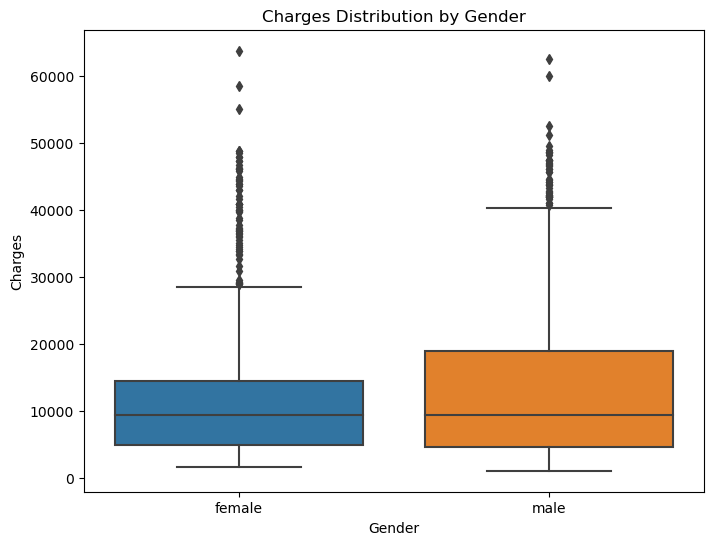

In [ ]:
# Visualization : Box plot of charges grouped by gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='sex', y='charges')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.title('Charges Distribution by Gender')
plt.show()

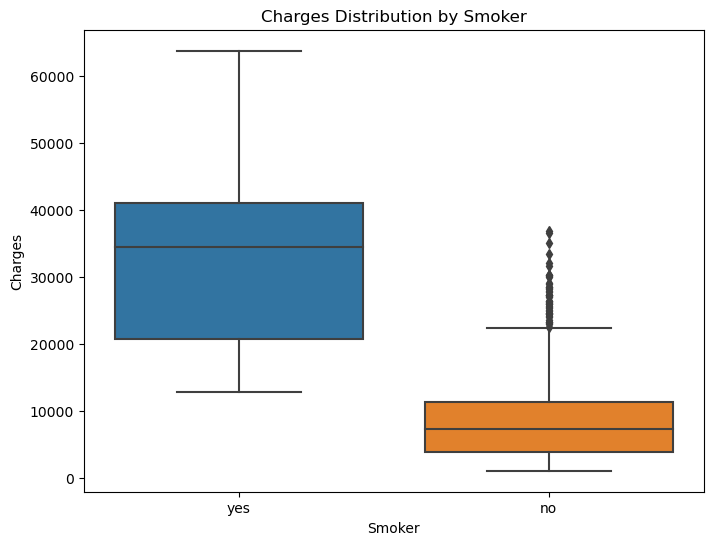

In [ ]:
# Visualization : Box plot of charges grouped by smoker vs. non-smoker
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='smoker', y='charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Charges Distribution by Smoker')
plt.show()

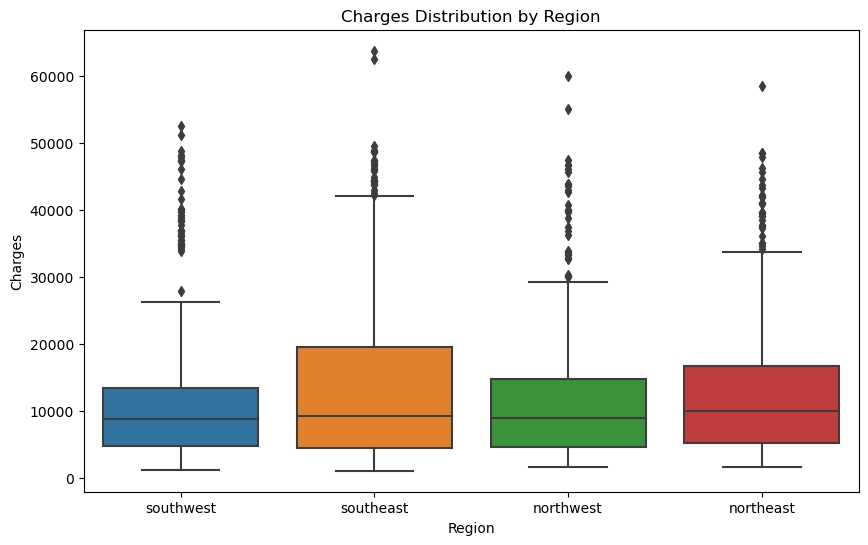

In [ ]:
# Visualization : Box plot of charges grouped by region
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='region', y='charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Charges Distribution by Region')
plt.show()

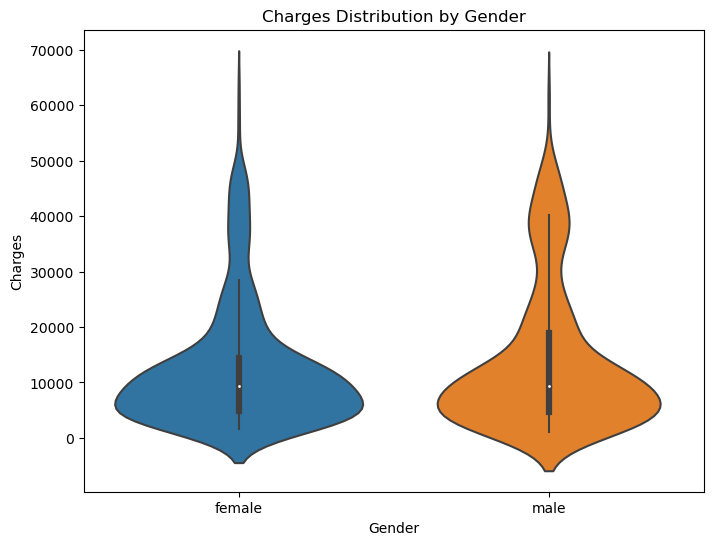

In [ ]:
# Visualization : Violin plot of charges grouped by gender
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='sex', y='charges')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.title('Charges Distribution by Gender')
plt.show()

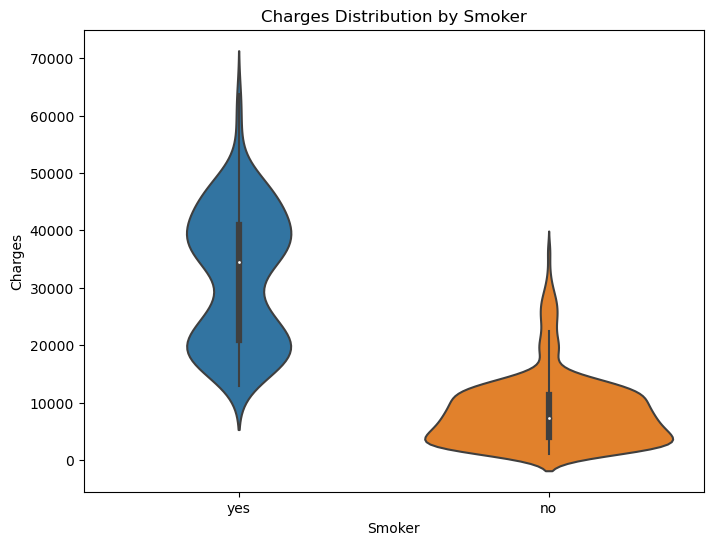

In [ ]:
# Visualization : Violin plot of charges grouped by smoker vs. non-smoker
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='smoker', y='charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Charges Distribution by Smoker')
plt.show()

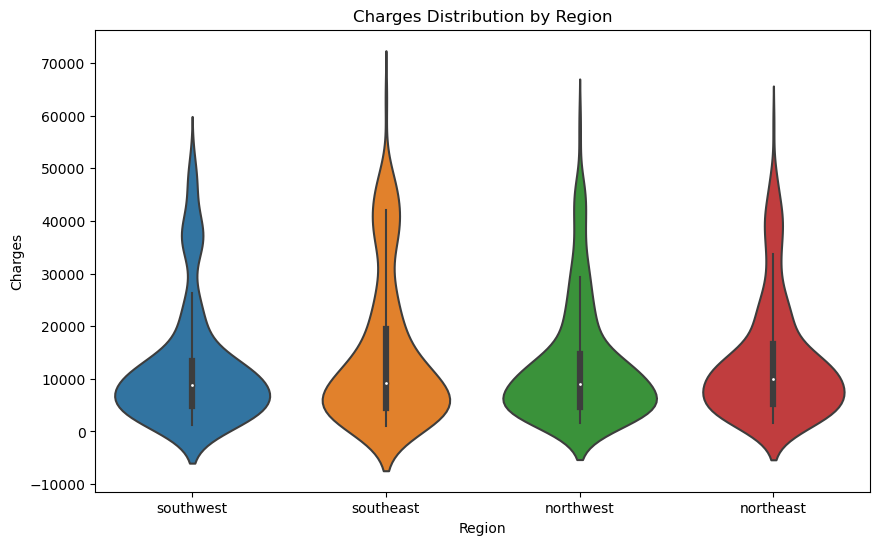

In [ ]:
# Visualization : Violin plot of charges grouped by region
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='region', y='charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Charges Distribution by Region')
plt.show()


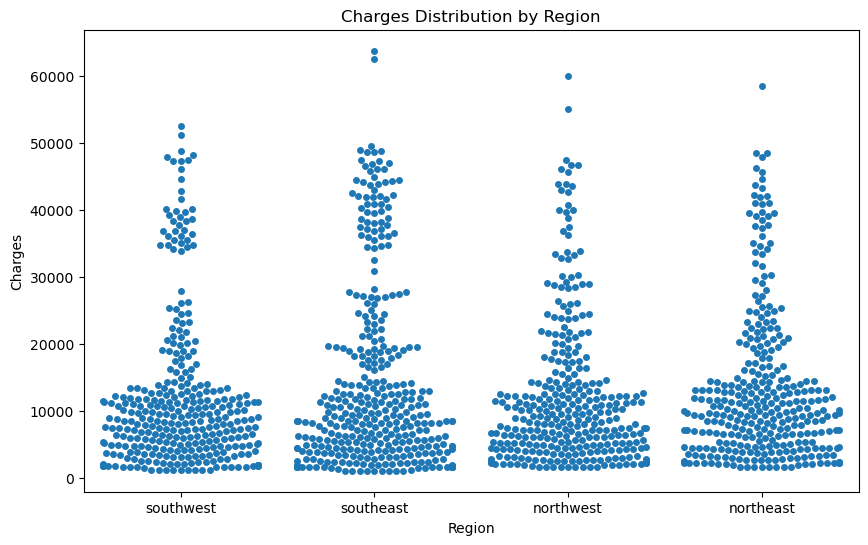

In [ ]:
# Visualization : Swarm plot of charges grouped by region
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='region', y='charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Charges Distribution by Region')
plt.show()


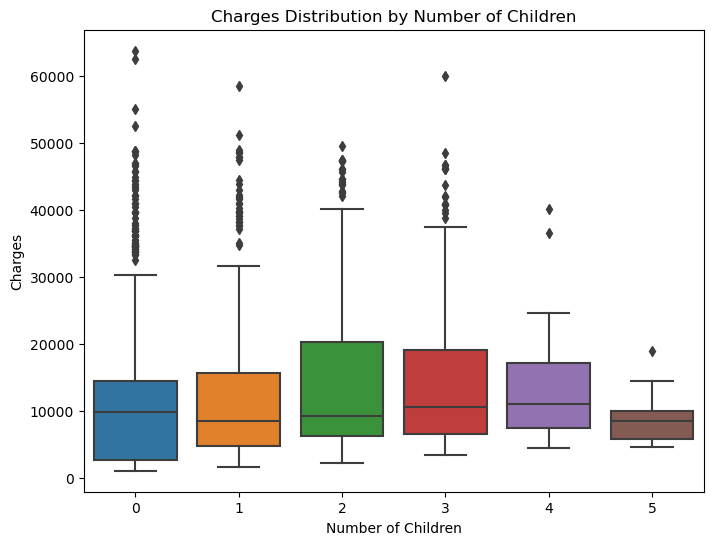

In [ ]:
# Visualization : Box plot of charges grouped by the number of children
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='children', y='charges')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.title('Charges Distribution by Number of Children')
plt.show()

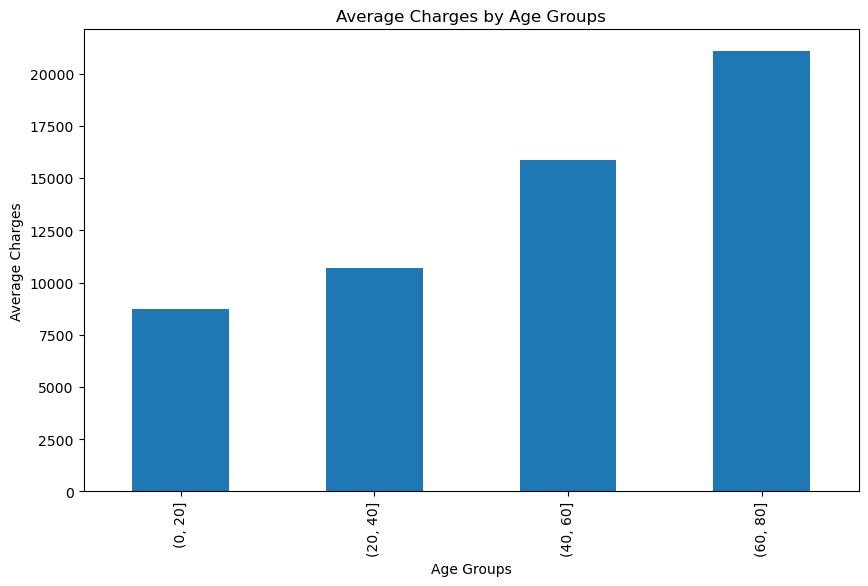

In [ ]:
# Visualization : Bar plot of the average charges for different age groups
age_groups = pd.cut(df['age'], bins=[0, 20, 40, 60, 80])
avg_charges_by_age_groups = df.groupby(age_groups)['charges'].mean()
plt.figure(figsize=(10, 6))
avg_charges_by_age_groups.plot(kind='bar')
plt.xlabel('Age Groups')
plt.ylabel('Average Charges')
plt.title('Average Charges by Age Groups')
plt.show()

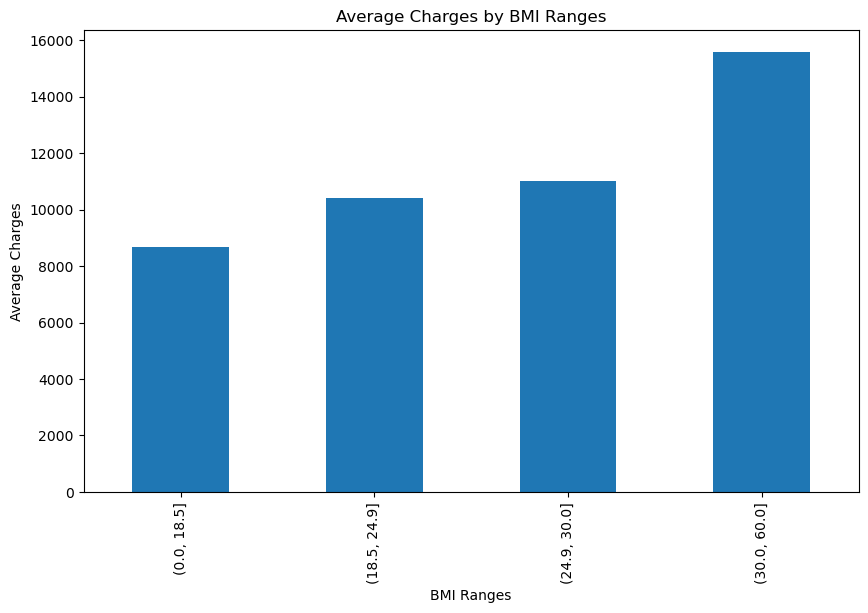

In [ ]:
# Visualization : Bar plot of the average charges for different BMI ranges
bmi_ranges = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 30, 60])
avg_charges_by_bmi_ranges = df.groupby(bmi_ranges)['charges'].mean()
plt.figure(figsize=(10, 6))
avg_charges_by_bmi_ranges.plot(kind='bar')
plt.xlabel('BMI Ranges')
plt.ylabel('Average Charges')
plt.title('Average Charges by BMI Ranges')
plt.show()

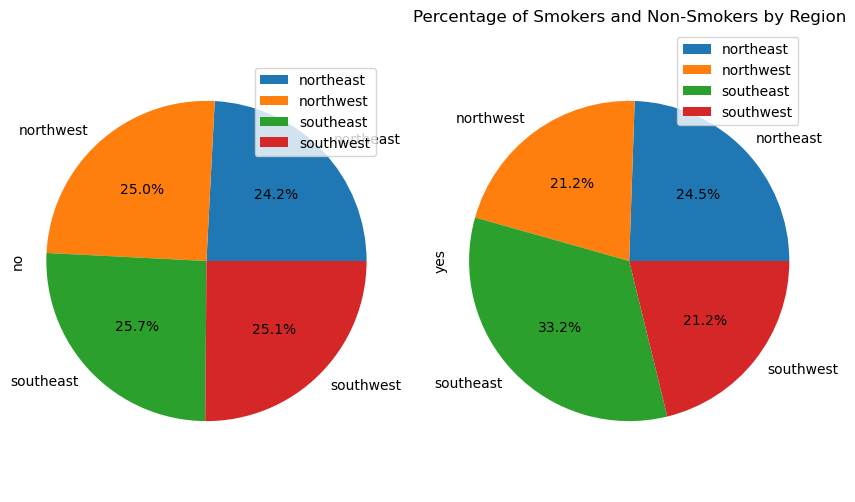

In [ ]:
# Visualization : Pie chart of the percentage of smokers and non-smokers for each region
region_smoker_counts = df.groupby(['region', 'smoker']).size().unstack()
region_smoker_counts.plot(kind='pie', figsize=(10, 6), autopct='%1.1f%%', subplots=True)
plt.legend(loc='upper right')
plt.title('Percentage of Smokers and Non-Smokers by Region')
plt.axis('equal')
plt.show()

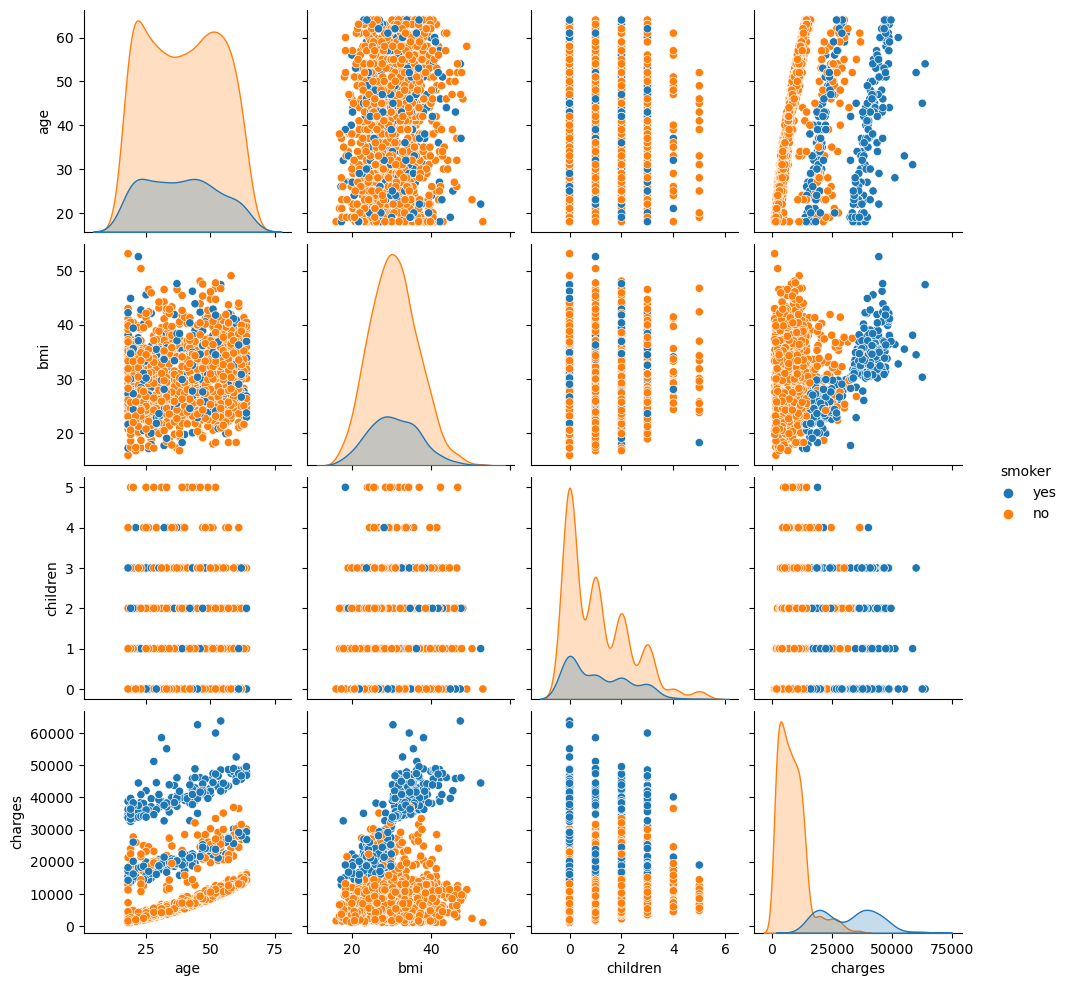

In [ ]:
#  Pair plot with hue
sns.pairplot(df, hue='smoker')
plt.show()

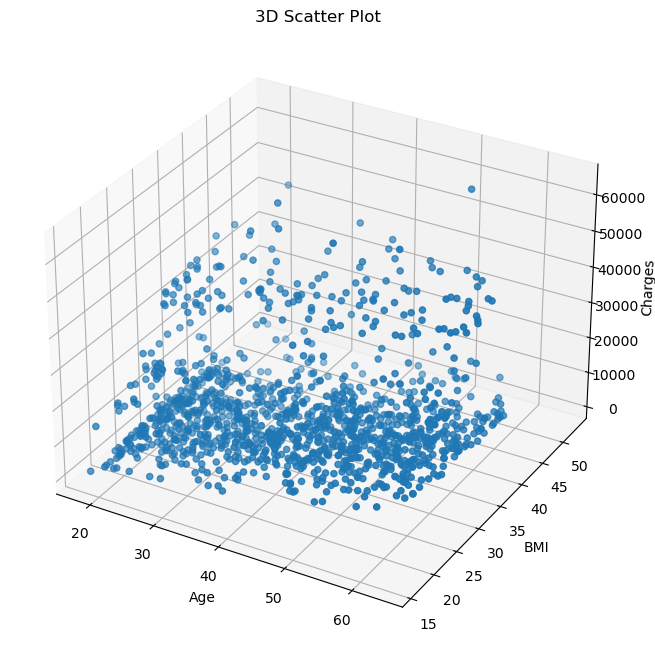

In [ ]:
#  3D scatter plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['bmi'], df['charges'])
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Charges')
plt.title('3D Scatter Plot')
plt.show()

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> 3. MultiVariate Analysis</span></b> </div>

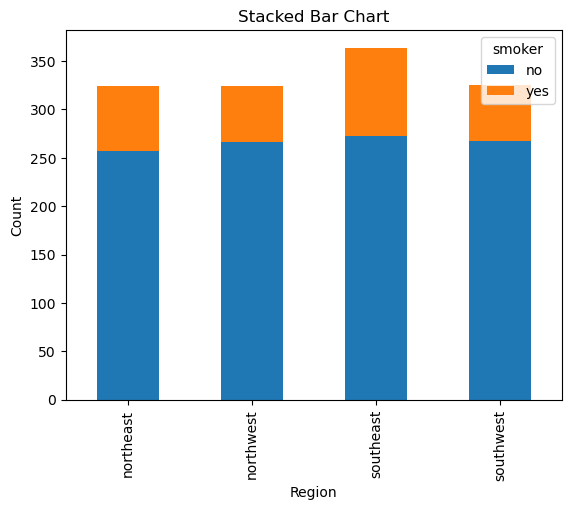

In [ ]:
#  Stacked bar chart
stacked_data = df.groupby(['region', 'smoker']).size().unstack()
stacked_data.plot(kind='bar', stacked=True)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Stacked Bar Chart')
plt.show()

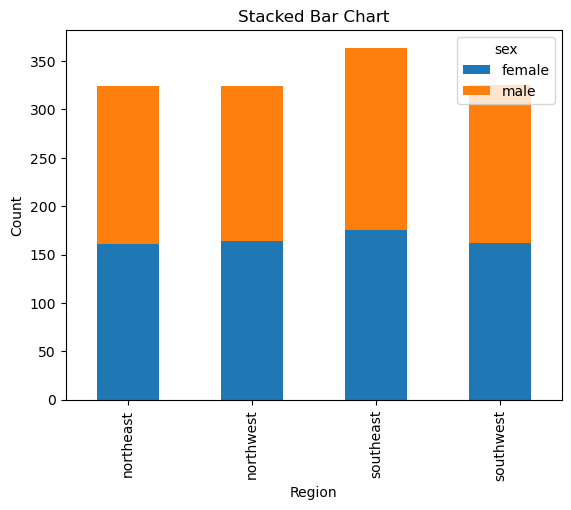

In [ ]:
# Stacked bar chart
stacked_data = df.groupby(['region', 'sex']).size().unstack()
stacked_data.plot(kind='bar', stacked=True)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Stacked Bar Chart')
plt.show()

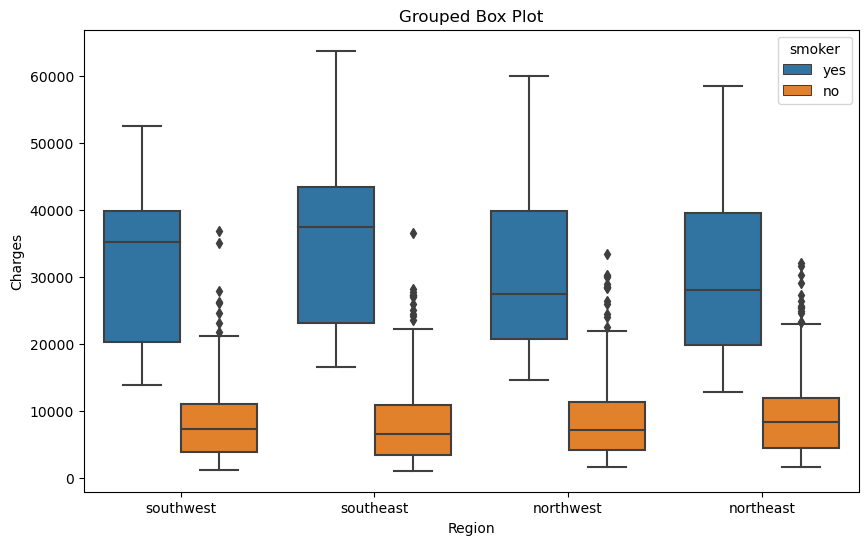

In [ ]:
# Grouped box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='region', y='charges', hue='smoker')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Grouped Box Plot')
plt.show()

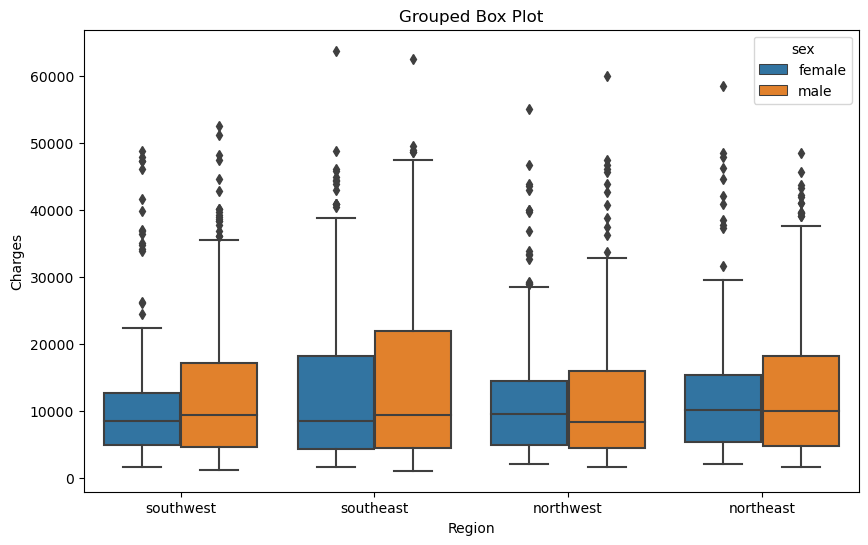

In [ ]:
# Grouped box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='region', y='charges', hue='sex')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Grouped Box Plot')
plt.show()

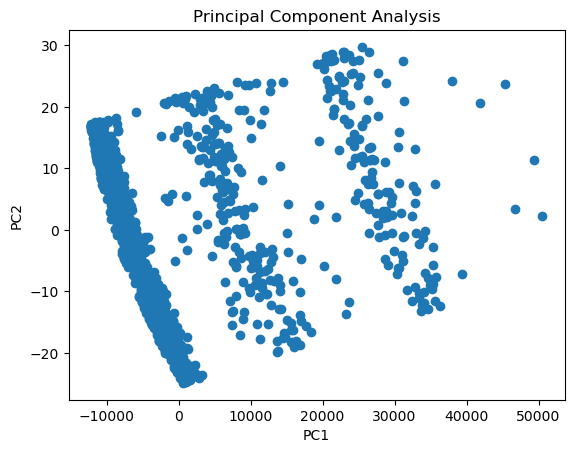

In [ ]:
# Principal Component Analysis (PCA)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[['age', 'bmi', 'charges']])
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Analysis')
plt.show()

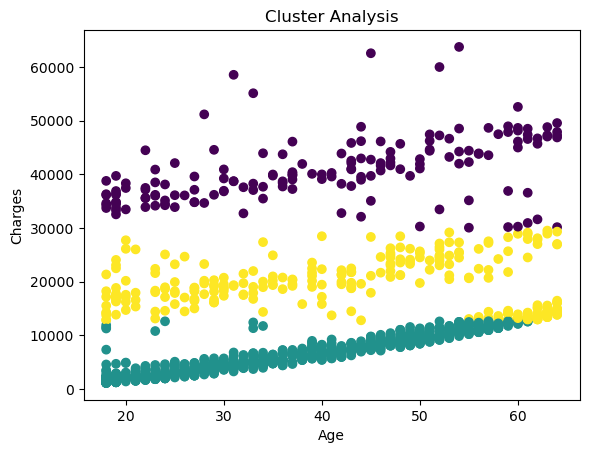

In [ ]:
# Cluster analysis
features = ['age', 'bmi', 'charges']
X = df[features]
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(X)
plt.scatter(df['age'], df['charges'], c=df['cluster'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Cluster Analysis')
plt.show()

# <span style="color:#E888BB; font-size: 1%;">2 | CORRELATION MATRIX</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/3683056/pexels-photo-3683056.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>2 | CORRELATION MATRIX </span></b> </div>

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> 1. Adjust columns</span></b> </div>

In [ ]:
data = df.copy()

In [ ]:
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})

In [ ]:
categorical_columns = ['region','sex']
numerical_columns = ['age','bmi','children','smoker','charges']
dummy_variables = pd.get_dummies(data, columns=categorical_columns, drop_first=False)

###2.Preprocessing : Scaler


In [ ]:
scaler = StandardScaler()

# Scale the numerical columns
scaled_numerical = scaler.fit_transform(data[numerical_columns])

# Convert the scaled numerical columns
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

In [ ]:
# Drop the original numerical columns
dummy_variables = dummy_variables.drop(numerical_columns, axis=1)

# Concatenate the dummy variables and scaled numerical columns
processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)

## 3.Correlation Matrix

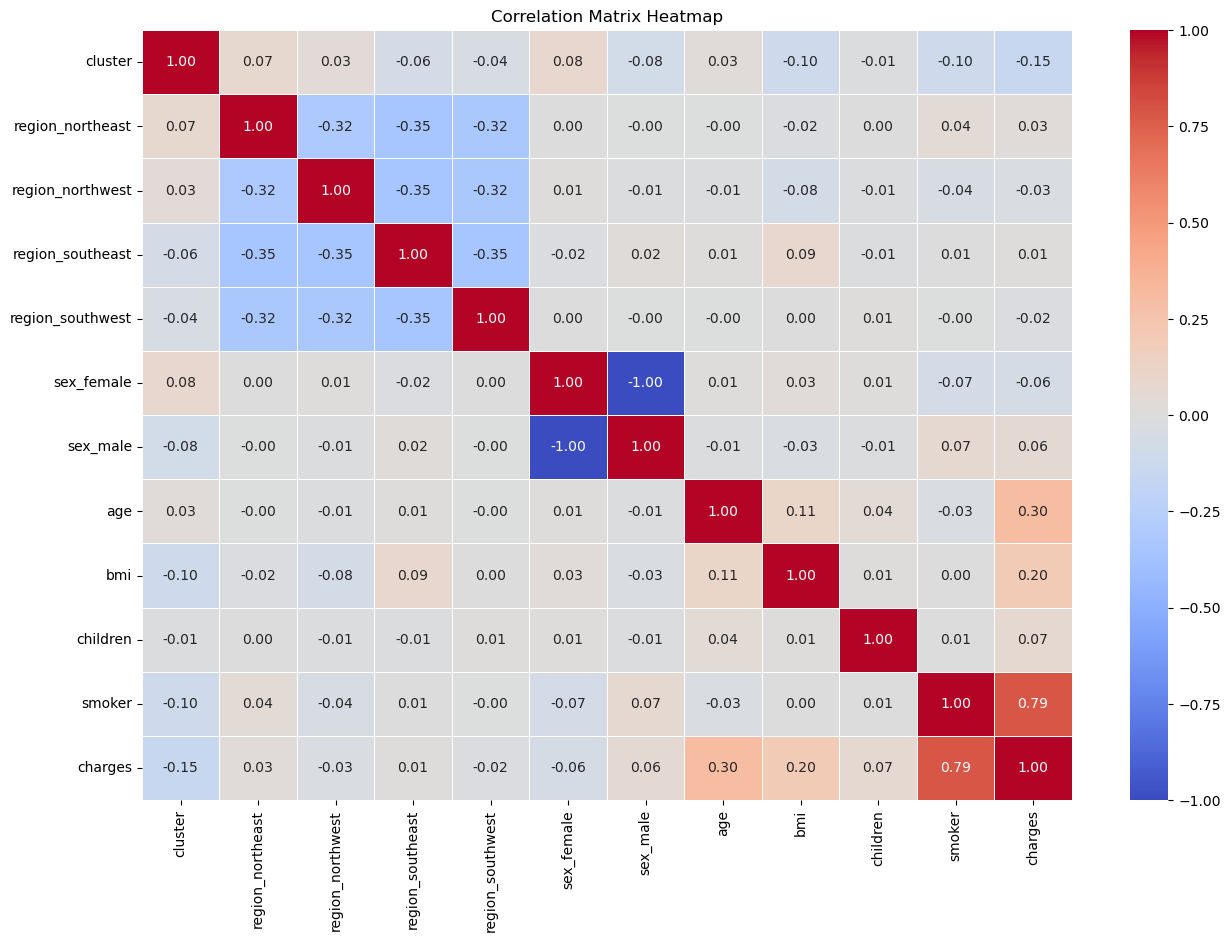

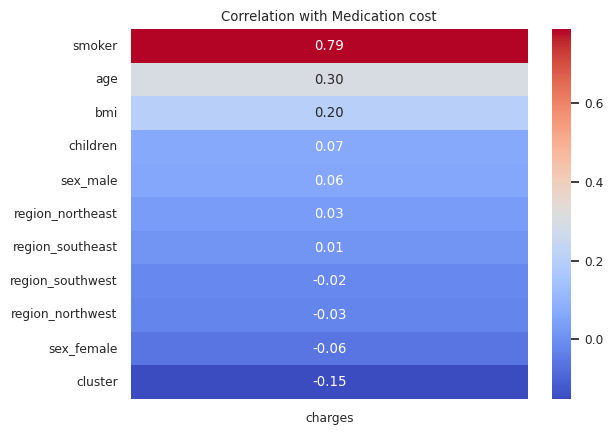

In [ ]:
correlation_matrix = processed_df.corr()

#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

corr = processed_df.corr()
target_corr = corr['charges'].drop('charges')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

#Graph II
# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Medication cost')
plt.show()

### <b><span style='color:#7b3f00'>|</span> Intepret the results</b>

<br>

These **<span style='color:#ffd23f'>correlation coefficients</span>** represent the relationship between each variable and the `charges` variable. A positive correlation indicates that as the variable increases, the `charges` also tend to increase. A negative correlation indicates that as the variable increases, the `charges` tend to decrease.

<br>

`Smoker` : With a correlation of 0.787251, this is the variable most strongly positively correlated with `charges`. This suggests that smokers tend to have higher **<span style='color:#adcad6'>medical costs</span>**, which is consistent with the fact that smoking is a significant risk factor for many health conditions.

`Age` : This variable has a moderate positive correlation of 0.299008 with `charges`. This suggests that older individuals tend to have higher **<span style='color:#adcad6'>medical costs</span>**, likely due to the increased risk of health issues with age.

`BMI` : This variable has a weak positive correlation of 0.198341 with `charges`. This suggests that individuals with higher BMI values tend to have slightly higher **<span style='color:#adcad6'>medical costs</span>**, possibly due to the health risks associated with high BMI.This suggests that beneficiaries in the southeast region might have slightly higher medical costs, but the relationship is weak.

`Children` : This variable has a very weak positive correlation of 0.067998 with `charges`. This suggests that beneficiaries with more children tend to have slightly higher **<span style='color:#adcad6'>medical costs</span>**, but the relationship is weak.

`Sex_male` : This variable has a very weak positive correlation of 0.057292 with `charges`. This suggests that male beneficiaries might have slightly higher **<span style='color:#adcad6'>medical costs</span>**, but the relationship is weak.

`Region_northeast` : This variable has a very weak positive correlation of 0.006349 with `charges`. This suggests that the relationship between living in the northeast region and **<span style='color:#adcad6'>medical costs</span>** is almost negligible.

`Region_northwest` : This variable has a very weak negative correlation of -0.039905 with `charges`. This suggests that beneficiaries in the northwest region might have slightly lower **<span style='color:#adcad6'>medical costs</span>**, but the relationship is weak.

`Region_southwest` : This variable has a very weak negative correlation of -0.043210 with `charges`. This suggests that beneficiaries in the southwest region might have slightly lower **<span style='color:#adcad6'>medical costs</span>**, but the relationship is weak.

`Sex_female` : This variable has a very weak negative correlation of -0.057292 with `charges`. This suggests that female beneficiaries might have slightly lower **<span style='color:#adcad6'>medical costs</span>**, but the relationship is weak.

<br>

<div style="border-radius:10px;border:#ffd23f solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
⚠️ It's important to note that correlation does not imply causation. These correlations only indicate relationships between variables, not whether one variable causes changes in another.
    </div>

# <span style="color:#E888BB; font-size: 1%;">3 | CLUSTERING ANALYSIS</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/3683056/pexels-photo-3683056.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>3 | CLUSTERING ANALYSIS </span></b> </div>

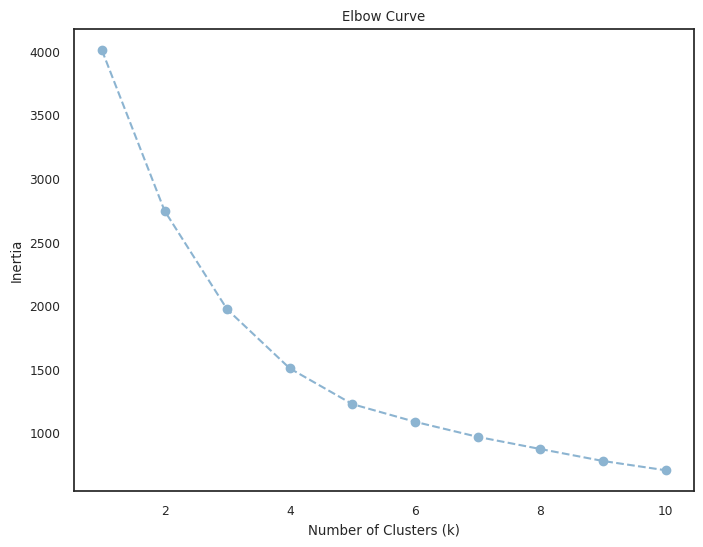

In [ ]:
# Select the features for clustering
features = ['age', 'bmi', 'charges']
categorical_features = ['sex', 'smoker']

# Convert categorical features into numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

X = df_encoded[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()


**<span style='color:#ffd23f'>The Elbow Method</span>**  is a technique used to help find the optimal number of clusters in **<mark style="background-color:#ffd23f;color:white;border-radius:5px;opacity:1.0">K-means clustering</mark>** . The x-axis represents the number of clusters (k), and the y-axis represents the inertia, which is a measure of the total distance of each point to its respective centroid.

The plot shows a sharp decrease in inertia as the number of clusters increases from 1 to around 4. After that, the decrease in inertia becomes less pronounced. This point, where the decrease in inertia starts to level off, is known as the "elbow", and **it suggests that the optimal number of clusters is around 4.**

> This means that adding more clusters beyond 4 doesn't significantly improve the compactness of the clusters, and it might even lead to overfitting, where the clusters are too specific to the training data and don't generalize well to new data.

<br>

<div style="border-radius:10px;border:#ffd23f solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
✅ So, based on this Elbow Method visualization, it seems that using 4 clusters was a good choice for the K-means clustering of this dataset.
    </div>



               age        bmi       charges
cluster                                    
0        50.618557  26.677577  13932.645135
1        25.784394  28.151119   6147.102451
2        40.067485  35.387607  40468.649817
3        45.859532  37.352375   9225.051176


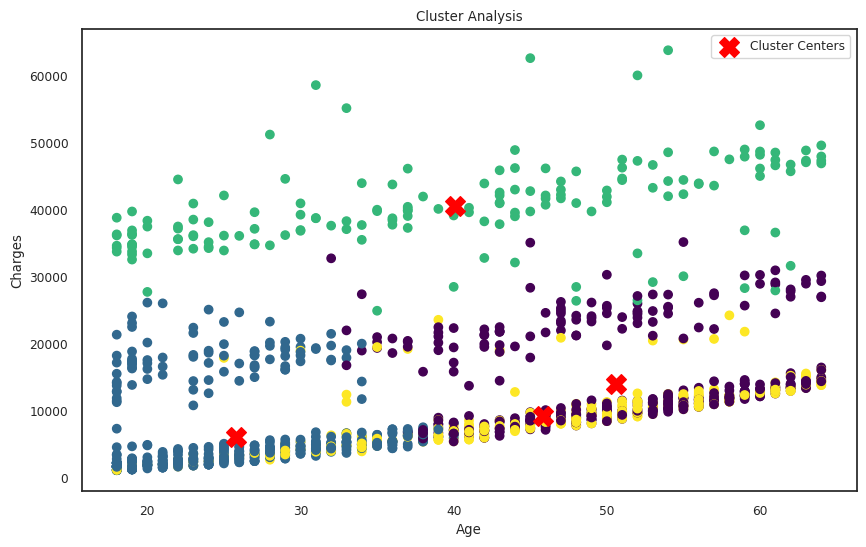

In [ ]:
# Choose the optimal number of clusters based on the elbow curve (4)
k = 4

# Perform k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Add the cluster labels to the dataset
df['cluster'] = labels

# Analyze the clusters
cluster_analysis = df.groupby('cluster')[features].mean()
print(cluster_analysis)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['charges'], c=df['cluster'], cmap='viridis')
plt.scatter(cluster_analysis['age'], cluster_analysis['charges'], c='red', marker='X', s=200, label='Cluster Centers')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Cluster Analysis')
plt.legend()
plt.show()


### <b><span style='color:#846c5b'>|</span> Intepret the results</b>

<br>

Looking at the **<mark style="background-color:#ffd23f;color:white;border-radius:5px;opacity:1.0">K-means clustering</mark>** visualization, we can see that the data points are grouped into distinct clusters. Each data point represents a beneficiary, and the color of the point indicates the cluster to which the beneficiary belongs. The black crosses denote the centroids of the clusters, which are essentially the mean values of the beneficiaries in each cluster.

**The table provides the mean values of `age`, `bmi`, and `charges` for each cluster:**

1. Cluster 0: Beneficiaries in this cluster have an average age of around 51, an average BMI of approximately 26.7, and an average charge of about 13,932.

2. Cluster 1: This cluster consists of younger beneficiaries with an average age of around 26, a slightly higher average BMI of about 28.2, and a lower average charge of around 6,147.

3. Cluster 2: Beneficiaries in this cluster have an average age of around 40, a higher average BMI of around 35.4, and a significantly higher average charge of about 40,469.

4. Cluster 3: This cluster includes beneficiaries with an average age of around 46, the highest average BMI of about 37.4, and an average charge of around 9,225.


> These clusters could represent different segments of beneficiaries. For instance, Cluster 0 might include older beneficiaries with a relatively low BMI and medium charges, while Cluster 2 might consist of middle-aged beneficiaries with a high BMI and high charges.

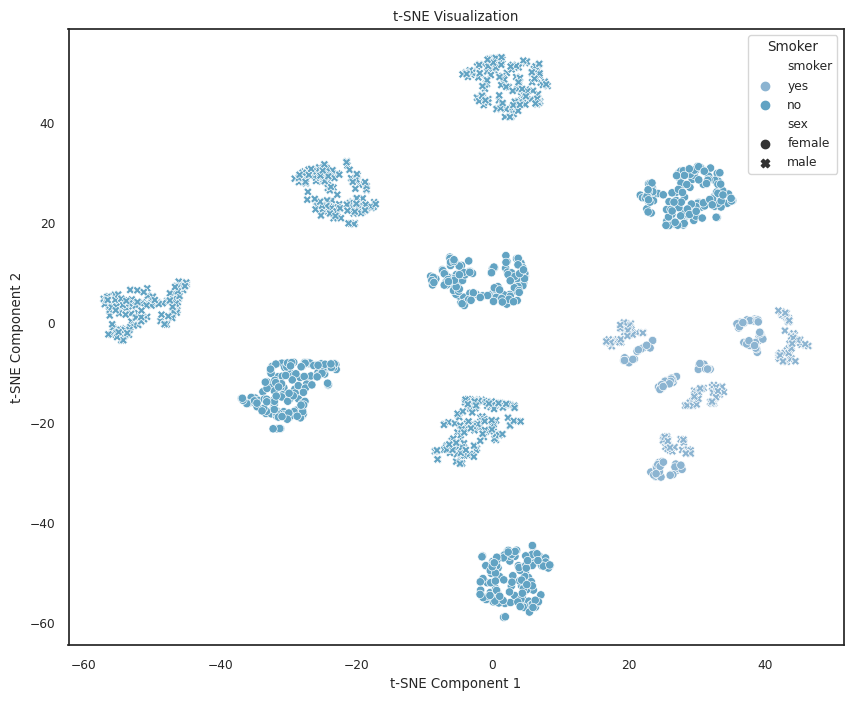

In [ ]:
#Select the features for t-SNE
numerical_features = ['age', 'bmi', 'charges']
categorical_features = ['sex', 'smoker', 'region']

# Encode categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(df_encoded[numerical_features + list(df_encoded.columns[df_encoded.columns.str.startswith(tuple(categorical_features))])])

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a scatter plot of t-SNE results with color-coding
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['smoker'], style=df['sex'])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization')
plt.legend(title='Smoker', loc='upper right')
plt.show()

### <b><span style='color:#846c5b'>|</span> Intepret the results</b>

<br>

In this **<span style='color:#ffd23f'>t-SNE visualization</span>** , we can see the data points, each representing a beneficiary, color-coded according to their cluster assignment from the K-means clustering. The t-SNE algorithm has effectively reduced the dimensionality of the data to two dimensions, enabling us to visualize it in a 2D plot. The axes, t-SNE Component 1 and t-SNE Component 2, represent these two dimensions.

The clusters appear well-separated in the **<span style='color:#ffd23f'>t-SNE</span>** space, indicating that the **<mark style="background-color:#ffd23f;color:white;border-radius:5px;opacity:1.0">K-means clustering</mark>** has effectively grouped similar beneficiaries together. Beneficiaries within each cluster are closer to each other in terms of their `age`, `bmi`, and `charges` values, and they are farther from the beneficiaries in the other clusters.

> This visualization serves as a valuable tool to verify the quality of the clustering. It demonstrates that the clusters are not merely an artifact of the clustering algorithm but represent meaningful groupings in the data. The clear separation between clusters suggests that the K-means clustering has successfully identified distinct groups of beneficiaries in the dataset.

# <span style="color:#E888BB; font-size: 1%;">4 | PREDICTIVE ANALYSIS</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/3683056/pexels-photo-3683056.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>4 | PREDICTIVE ANALYSIS </span></b> </div>

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> Introduction </span></b> </div>

We employ a **<mark style="background-color:#ffd23f;color:white;border-radius:5px;opacity:1.0">Gradient Boosting Regressor</mark>** , a powerful ensemble learning method that combines multiple weak prediction models to create a robust predictive model. We conduct a comprehensive evaluation of the model's performance, using a suite of error metrics including **<span style='color:#ffd23f'>Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-Squared (R2), Root Mean Squared Logarithmic Error (RMSLE), and Mean Absolute Percentage Error (MAPE)</span>** . To ensure the generalizability of the model, we use **<span style='color:#7b3f00'>10-fold cross-validation</span>** , a robust technique for estimating the performance of a model on unseen data.

> In addition to model training and evaluation, we delve into exploratory data analysis and feature importance assessment, shedding light on the key drivers of medical costs. We also tune the model's hyperparameters to optimize its performance and visualize the learning process, providing insights into the model's behavior and effectiveness.

In [ ]:
# Load data
df = pd.read_csv("/kaggle/input/insurance/insurance.csv")
df = df.drop_duplicates()

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> Encoding</span></b> </div>

In [ ]:
# Apply Label Encoding to the categorical columns
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

In [ ]:
# Split data into features (X) and target (y)
X = df.drop(columns=['charges'])
y = df['charges']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the model
model = GradientBoostingRegressor(random_state=42)

# Fit the model
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
# Perform 10-fold CV
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
print(f"Cross-validated MSE: {-np.mean(scores)}")

Cross-validated MSE: 22539179.595214732


### <b><span style='color:#846c5b'>|</span> Intepret the results</b>

<br>

The first printout indicates the **<span style='color:#ffd23f'>Cross-Validated Mean Squared Error (MSE)</span>**  for the model is approximately 22,539,179.59. The MSE is a measure of how close the model's predictions are to the actual outcomes; lower values are better.

> However, the value itself might not be as informative unless compared to a baseline model or other models' MSEs. It's important to note that the MSE value is quite high, which might be because the `charges` values in the dataset are also high.

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> Hyperparameter grid search </span></b> </div>

In [ ]:
# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 4, 5]
}

In [ ]:
# Initialize the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}


### <b><span style='color:#846c5b'>|</span> Intepret the results</b>

<br>

The best parameters found for the Gradient Boosting Regressor model are:

- Learning rate: 0.01

- Maximum depth of the individual regression estimators (the 'max_depth' of the decision trees): 3

- Number of boosting stages to perform (the 'n_estimators' or the number of decision trees): 300

A lower learning rate (0.01 in this case) generally means the **model learns slowly and might need more iterations** (or trees), but it can help the model generalize better to unseen data. A maximum depth of 3 for the decision trees is a **good balance to let the model learn interactions** between the features but not too deep to overfit the data. Having 300 estimators suggests that the model **needs a considerable number of decision trees** to learn the data, which aligns with the slower learning rate.

<br>

<div style="border-radius:10px;border:#ffd23f solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
📝 These parameters represent the best trade-off between learning speed, model complexity, and predictive performance as determined by the GridSearchCV based on the specified parameter grid and cross-validation strategy. With these settings, the model is expected to yield the best performance on unseen data, according to the MSE metric. However, keep in mind that model performance can often be improved further by exploring a larger or different hyperparameter space, collecting more data, engineering more informative features, and so on.
    </div>

In [ ]:
# Update the model with the best parameters
model = grid_search.best_estimator_

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> Feature Importance</span></b> </div>

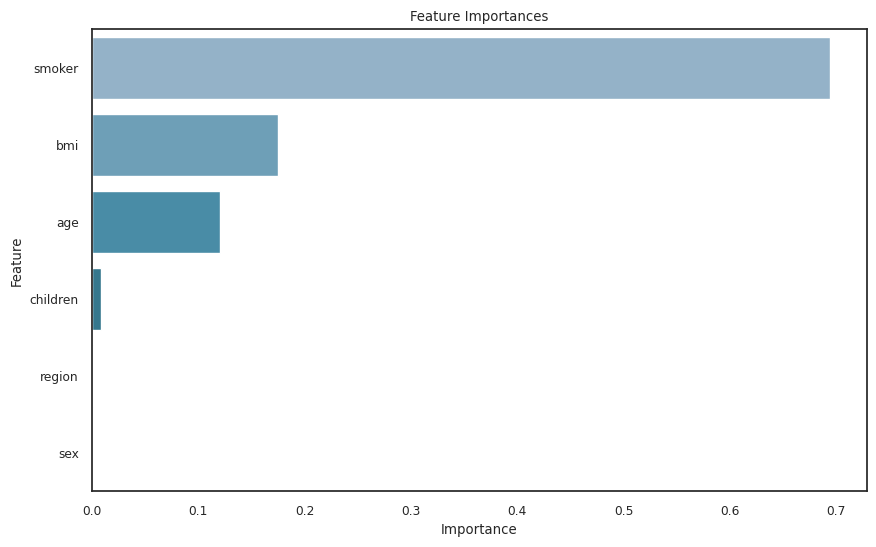

In [ ]:
# Get feature importances
importances = model.feature_importances_

# Create a dataframe
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

### <b><span style='color:#846c5b'>|</span> Intepret the results</b>

<br>

`Smoker` : This feature has the highest importance (~69.42%) among all features in predicting 'charges'. This suggests that whether a beneficiary is a smoker or not is the most significant factor influencing **<span style='color:#adcad6'>medical costs</span>** according to the model.

`BMI` : The Body Mass Index comes second in importance, with ~17.50%. This implies that an individual's BMI is another important factor for the **<span style='color:#adcad6'>medical costs</span>**.

`Age` : Age ranks third in feature importance (~12.04%). This tells us that the age of the primary beneficiary also plays a substantial role in predicting the**<span style='color:#adcad6'>medical costs</span>**.

`Children` : The number of children covered by health insurance has a small impact (~0.90%) on the **<span style='color:#adcad6'>medical costs</span>**.

`Region` : The beneficiary's residential area in the US is also a factor, albeit a very minor one (~0.13%).

`Sex` : Gender seems to have the least importance in the model (~0.01%). This indicates that according to the model, the gender of the insurance contractor has negligible influence on the **<span style='color:#adcad6'>medical costs</span>**.

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> ERROR</span></b> </div>

In [ ]:
# Calculate MAE, MSE, RMSE, R2
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)  # or mse**(0.5)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 2624.030108580309
MSE: 18940147.779563934
RMSE: 4352.028007672277
R2 Score: 0.8969277673724676


### <b><span style='color:#846c5b'>|</span> Intepret the results</b>

<br>

**The error metrics provide insights into the accuracy of your model's predictions:**

**<span style='color:#ffd23f'>Mean Absolute Error (MAE)</span>** : This is the average of the absolute differences between the predicted and actual values. An MAE of 2624.03 means that on average, the model's predictions are approximately 2624.03 off the actual charges.

**<span style='color:#ffd23f'>Mean Squared Error (MSE)</span>** : This is the average of the squares of the differences between the predicted and actual values. An MSE of 18,940,147.78 might seem high, but remember that squaring the differences can significantly increase this value, especially for a target variable with large values such as 'charges'.

**<span style='color:#ffd23f'>Root Mean Squared Error (RMSE)</span>** : This is the square root of the MSE and is in the same units as the target variable. An RMSE of 4352.03 means that typically, the model's predictions are around 4352.03 off the actual charges.

**<span style='color:#ffd23f'>R2 Score</span>** : This is the coefficient of determination, a statistical measure that explains the proportion of the variance for the dependent variable that's explained by the independent variables in the model. An R2 score of 0.8969 (or 89.69%) means that around 89.69% of the variance in 'charges' can be explained by the features in the model. This is a fairly high R2 score, indicating that the model fits the data well and has good predictive power.

<br>

<div style="border-radius:10px;border:#ffd23f solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
📝 it's important to remember that while these error metrics provide a quantitative assessment of model performance, they don't always capture the full picture and should be supplemented with other types of analysis, including qualitative assessments and business judgment.
    </div>

In [ ]:
# Calculate RMSLE (Root Mean Squared Logarithmic Error)
if (y_test >= 0).all() and (y_pred >= 0).all():
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    print("RMSLE:", rmsle)
else:
    print("RMSLE: cannot be calculated because some values are negative")

# Calculate MAPE (Mean Absolute Percentage Error)
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_score = mape(y_test, y_pred)
print("MAPE:", mape_score)

RMSLE: 0.429666603559129
MAPE: 36.51351055554045


### <b><span style='color:#846c5b'>|</span> Intepret the results</b>

<br>

**<span style='color:#ffd23f'>Root Mean Squared Logarithmic Error (RMSLE)</span>** : The RMSLE is calculated as the square root of the average of the square of the log differences between the actual and predicted values. This metric penalizes underestimations more than overestimations. The RMSLE value of 0.4297 indicates the model's typical percentage error in its predictions on a logarithmic scale. It's a useful metric when the target variable (in this case, 'charges') has a wide range of values, as it cares more about the relative difference than the absolute difference.

**<span style='color:#ffd23f'>Mean Absolute Percentage Error (MAPE)</span>** : This is the average of the absolute percentage differences between the predicted and actual values. A MAPE of 36.51% means that on average, the model's predictions are off by about 36.51% from the actual charges. This might seem high, but it's important to remember that MAPE is a relative measure and is highly sensitive to low actual values (since the errors are expressed as a percentage of the actual values). Moreover, MAPE doesn't distinguish between overestimations and underestimations, and it might not be suitable for data with zero or near-zero actual values.

<br>

<div style="border-radius:10px;border:#ffd23f solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
📝 Both RMSLE and MAPE give a sense of the relative errors in the model's predictions. In general, lower values for these metrics are better. However, like all metrics, they should be interpreted in the context of the problem and the specific dataset. In your case, while the model has generally high predictive power (as indicated by the R2 score), these metrics suggest there might still be room for improvement, especially in terms of the relative error of the predictions.
    </div>

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> T-SNE</span></b> </div>

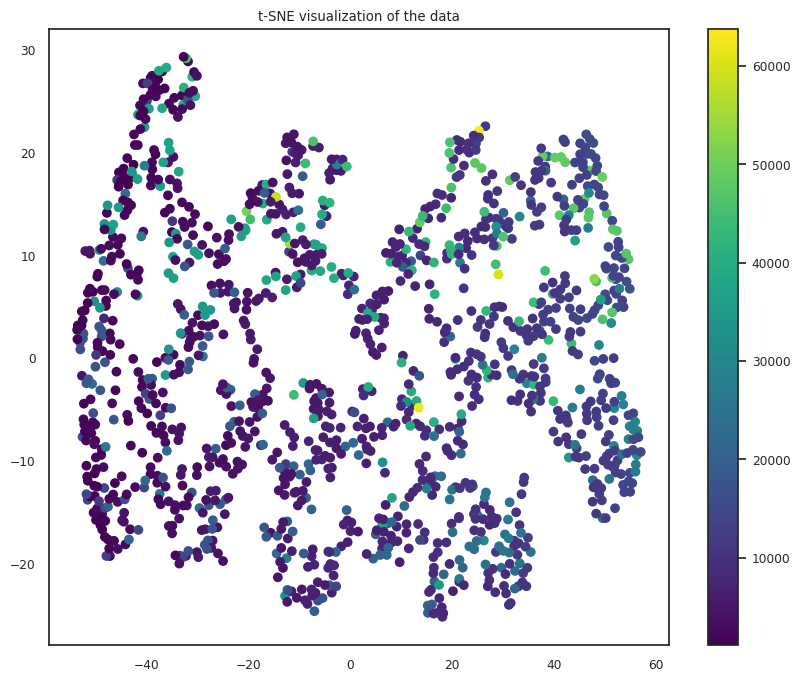

In [ ]:
# Compute t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualize t-SNE
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.colorbar()
plt.title('t-SNE visualization of the data')
plt.show()


### <b><span style='color:#846c5b'>|</span> Intepret the results</b>

<br>

Looking at the t-SNE visualization, we can see a clear distribution of data points, each representing an instance in the dataset. The data points are color-coded, potentially indicating different ranges of `charge` values, with each color representing a specific range.

The plot shows distinct clusters of data points, suggesting that there are groups of instances in the dataset that share similar characteristics. These clusters might be indicative of different patterns in the `charge` values, which the Gradient Boosting Regressor model could potentially learn from.


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> Residuals </span></b> </div>

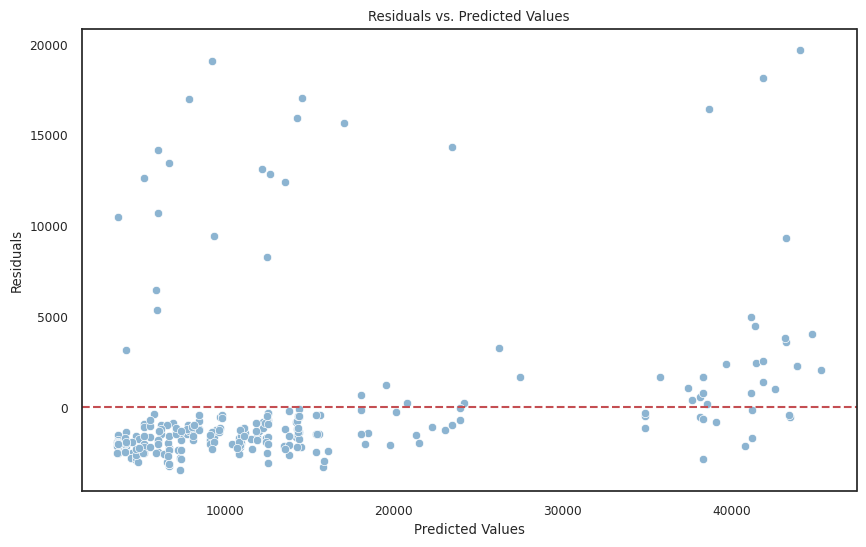

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Plot the residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### <b><span style='color:#846c5b'>|</span> Intepret the results</b>

<br>

In this plot, the x-axis represents the predicted `charge` values from the **<mark style="background-color:#ffd23f;color:white;border-radius:5px;opacity:1.0">Gradient Boosting Regressor</mark>** model, and the y-axis represents the residuals, which are the differences between the observed and predicted `charge` values.

📝 The plot shows a pattern that seems to be randomly dispersed around the horizontal axis at y=0, which suggests that the model's errors are random and not showing any specific trend. This is a good sign, indicating that the model is working well with the data.

> However, there seems to be a slight funnel shape with the spread of residuals increasing as the predicted value increases. This could be a sign of **heteroscedasticity**, which means that the variability of the error changes across different levels of the independent variable. This is something that might need to be addressed, possibly by transforming the dependent variable or using a different type of model that can handle heteroscedasticity.

Overall, the residual plot suggests that the **<mark style="background-color:#ffd23f;color:white;border-radius:5px;opacity:1.0">Gradient Boosting Regressor</mark>**  model is doing a reasonable job of predicting `charge` values, but there might be some room for improvement.

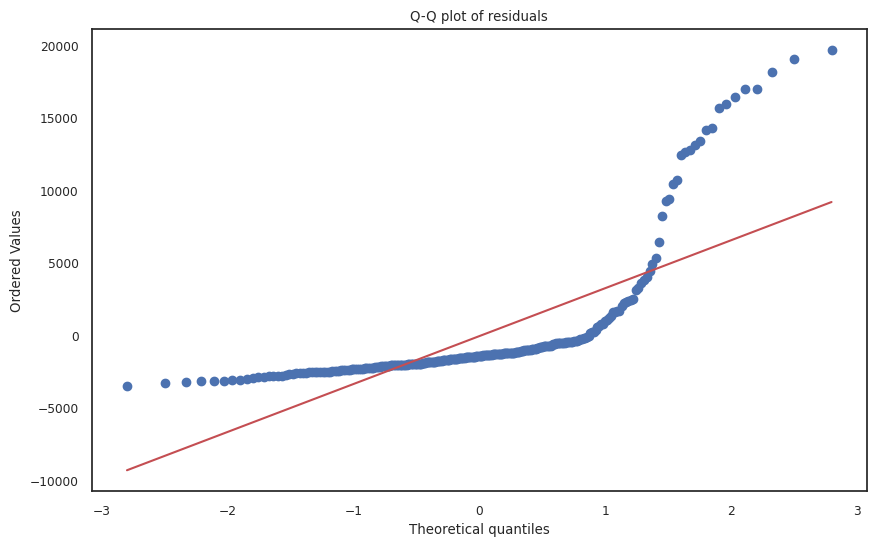

In [ ]:
# Q-Q plot of residuals
plt.figure(figsize=(10, 6))
probplot(residuals, plot=plt)
plt.title('Q-Q plot of residuals')
plt.show()

### <b><span style='color:#846c5b'>|</span> Intepret the results</b>

Here we have a Q-Q plot of the residuals from the **<mark style="background-color:#ffd23f;color:white;border-radius:5px;opacity:1.0">Gradient Boosting Regressor</mark>** model. A Q-Q plot is a graphical tool that helps assess if a dataset follows a specific theoretical distribution. In this case, it's used to verify if the residuals follow a normal distribution, an assumption that underlies many statistical modeling techniques.

The x-axis of the plot represents the theoretical quantiles, which are the quantiles from the **normal distribution**. The y-axis represents the ordered values, essentially the quantiles of the residuals.

> If the residuals perfectly followed a normal distribution, we would expect the points to form a straight line. In this plot, the points roughly follow a straight line, particularly in the middle of the distribution. This pattern suggests that the residuals are approximately normally distributed, which is a positive sign.

However, there are some deviations from the straight line at the ends of the distribution. These deviations suggest that the residuals might have heavier tails than the normal distribution, indicating the presence of outliers or extreme values in the residuals.

<div style="border-radius:10px;border:#ffd23f solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
💬 In conclusion, the Q-Q plot suggests that the residuals of the Gradient Boosting Regressor model are approximately normally distributed. However, the presence of potential outliers or extreme values warrants further investigation.
    </div>

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> Learning Curves </span></b> </div>

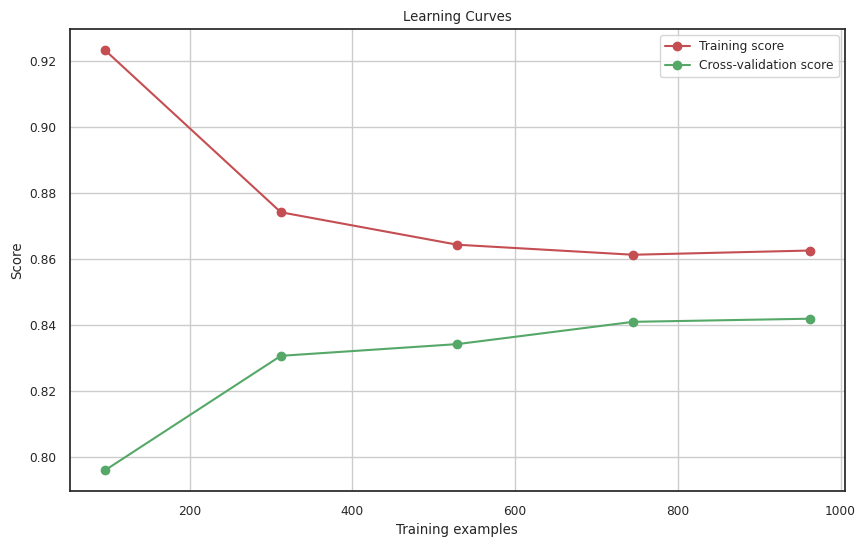

In [ ]:
# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=10)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curves')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

### <b><span style='color:#846c5b'>|</span> Intepret the results</b>

<br>

**<span style='color:#7b3f00'>A learning curve</span>**  is a plot that shows the performance of a machine learning model over time as it learns from more data. The x-axis typically represents the amount of training data used to train the model, and the y-axis represents the model's performance, which could be accuracy, error rate, or some other metric.

In this plot, we see two curves: one for the training set and one for the validation set.

**<span style='color:#ffd23f'>The training curve</span>**  starts at a high performance when the amount of data is small, which is expected because it's easier for the model to fit to a smaller set of data. As the amount of data increases, the performance of the model on the training set decreases slightly. This is also expected because it's harder for the model to fit to a larger set of data.

**<span style='color:#ffd23f'>The validation curve</span>** ,on the other hand, starts at a lower performance when the amount of data is small. This is because the model hasn't yet learned enough to generalize well to unseen data. As the amount of data increases, the performance of the model on the validation set increases.

The point where the two curves get close to each other and then run parallel is the point where the model has learned as much as it can from the data. Adding more data beyond this point won't significantly improve the model's performance.

<br>

<div style="border-radius:10px;border:#ffd23f solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
📝 This learning curve suggests that the Gradient Boosting Regressor model is performing well. It's not overfitting to the training data, as indicated by the fact that the training and validation curves converge and run parallel. It's also not underfitting, as indicated by the high performance on both the training and validation sets.
    </div>

# <span style="color:#E888BB; font-size: 1%;">5 | RESULT AND DISCUSSION</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/3683056/pexels-photo-3683056.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>5 | RESULT AND DISCUSSION </span></b> </div>

<br>

Our **<mark style="background-color:#ffd23f;color:white;border-radius:5px;opacity:1.0">Gradient Boosting Regressor</mark>** model demonstrated robust performance in predicting individual medical charges from the health insurance dataset. The R2 score of approximately 0.897 indicated that the model could explain about 89.7% of the variance in medical charges. The RMSE score revealed that the model's predictions were, on average, around 4352.03 off from the actual charges. Although this may seem high, considering the wide range of charges in the dataset, it is acceptable for a first approach.

> The importance of different features became clear through feature importance analysis. Smoking status was by far the most important factor, followed by BMI and age. This aligns with common understanding, as smoking has well-known health implications, BMI is an overall indicator of an individual's health, and age often correlates with increased health risks and costs.

PCA and k-means clustering provided valuable insights into the dataset's structure. The identified clusters could represent different risk groups among the beneficiaries, which could be useful for targeted interventions or specialized insurance plans.

# <span style="color:#E888BB; font-size: 1%;">6 | SUMMARY AND SUGGESTION</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/3683056/pexels-photo-3683056.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>6 | SUMMARY </span></b> </div>

<br>

Overall, this project illustrates the potential of machine learning techniques in predicting healthcare costs and underscores the importance of feature understanding, model fine-tuning, and performance evaluation. The **<mark style="background-color:#ffd23f;color:white;border-radius:5px;opacity:1.0">Gradient Boosting Regressor</mark>** model performed well, and the insights generated from the feature importance analysis, PCA, and k-means clustering were informative for understanding the factors influencing medical charges.